
#Import all requierd Libraries


In [ ]:
# import all tools we need

#Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# We want our plots to be appeared inside the notebook
%matplotlib inline

# Models from sickit-learn(sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

# Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc


from sklearn import metrics
from sklearn.metrics import roc_curve

# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

#Libraries for Neural Network Based model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical



#Read Data

In [ ]:
#mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Move to desired directory
%cd /content/drive/MyDrive/Research Works/CS6375/Programming Project/

/content/drive/MyDrive/Research Works/CS6375/Programming Project


In [ ]:
#read the csv data
import pandas as pd
df=pd.read_csv('data/Acoustic Features.csv')

#Regular EDA(exploratory data analysis)

In [ ]:
#show only last 5 rows
df.head(5)

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
0,2,0.05,0.59,9.14,130.04,4.00,0.36,0.89,0.08,0.22,...,0.43,1.00,0.01,0.10,0.32,0.26,0.02,1.03,0.59,0.97
1,2,0.12,0.44,6.68,142.24,4.06,0.52,0.79,0.40,0.56,...,0.00,1.00,0.00,0.98,0.28,0.21,-0.08,3.36,0.70,0.97
2,2,0.05,0.64,10.58,188.15,2.77,0.90,0.50,0.33,0.29,...,0.18,0.75,0.02,1.00,0.41,0.30,0.13,1.68,0.69,0.96
3,2,0.14,0.60,10.44,65.99,2.84,1.55,0.61,0.35,0.01,...,0.04,1.00,0.16,0.76,0.42,0.27,0.04,0.35,0.74,0.97
4,2,0.07,0.59,9.77,88.89,3.22,0.23,0.81,0.10,0.43,...,0.00,0.40,1.00,0.00,0.34,0.26,0.09,0.75,0.67,0.96


In [ ]:
#show only last 5 rows
df.tail()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
395,0,0.17,0.58,5.26,161.14,2.98,0.07,0.72,0.05,0.27,...,0.37,0.84,0.41,0.12,0.32,0.14,0.12,2.69,0.87,0.97
396,0,0.18,0.50,5.04,179.79,2.79,-0.15,0.34,-0.01,0.03,...,0.02,1.00,0.64,0.01,0.23,0.13,0.14,3.36,0.88,0.97
397,0,0.19,0.56,4.72,134.03,1.67,0.57,0.88,-0.11,0.24,...,0.05,0.18,0.29,0.10,0.27,0.16,0.11,3.36,0.82,0.96
398,0,0.14,0.57,4.47,113.60,2.00,-0.21,0.69,0.09,0.21,...,0.14,1.00,0.30,0.14,0.28,0.14,0.06,3.36,0.81,0.97
399,0,0.09,0.47,5.34,151.75,2.24,-0.01,0.83,-0.02,0.34,...,0.10,1.00,0.09,0.03,0.20,0.11,0.01,0.64,0.85,0.96


In [ ]:
# transpose the dataset
df.T

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
Class,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
_RMSenergy_Mean,0.05,0.12,0.05,0.14,0.07,0.14,0.12,0.10,0.14,0.13,...,0.20,0.08,0.10,0.07,0.07,0.17,0.18,0.19,0.14,0.09
_Lowenergy_Mean,0.59,0.44,0.64,0.60,0.59,0.51,0.53,0.57,0.54,0.62,...,0.53,0.60,0.50,0.66,0.53,0.58,0.50,0.56,0.57,0.47
_Fluctuation_Mean,9.14,6.68,10.58,10.44,9.77,7.66,7.48,7.01,6.85,8.67,...,5.83,5.58,6.84,5.10,4.44,5.26,5.04,4.72,4.47,5.34
_Tempo_Mean,130.04,142.24,188.15,65.99,88.89,116.04,136.44,141.13,82.05,93.02,...,118.45,109.53,97.56,170.06,128.35,161.14,179.79,134.03,113.60,151.75
_MFCC_Mean_1,4.00,4.06,2.77,2.84,3.22,2.31,4.57,3.50,4.01,2.32,...,2.80,2.25,2.05,2.68,1.68,2.98,2.79,1.67,2.00,2.24
_MFCC_Mean_2,0.36,0.52,0.90,1.55,0.23,-0.08,1.17,0.55,0.55,0.74,...,-0.39,0.17,-0.31,-0.04,0.58,0.07,-0.15,0.57,-0.21,-0.01
_MFCC_Mean_3,0.89,0.79,0.50,0.61,0.81,0.36,0.94,0.28,0.57,0.54,...,0.59,0.45,0.75,0.88,0.73,0.72,0.34,0.88,0.69,0.83
_MFCC_Mean_4,0.08,0.40,0.33,0.35,0.10,0.03,0.36,0.27,0.56,-0.12,...,-0.10,0.22,0.01,-0.07,0.43,0.05,-0.01,-0.11,0.09,-0.02
_MFCC_Mean_5,0.22,0.56,0.29,0.01,0.43,-0.14,0.02,0.26,0.22,0.12,...,0.28,-0.04,-0.07,0.03,0.26,0.27,0.03,0.24,0.21,0.34


In [ ]:
#shape of the dataset
df.shape

(400, 51)

In [ ]:
# Let's find out how many of each class there
df["Class"].value_counts()

2    100
1    100
3    100
0    100
Name: Class, dtype: int64

<Axes: >

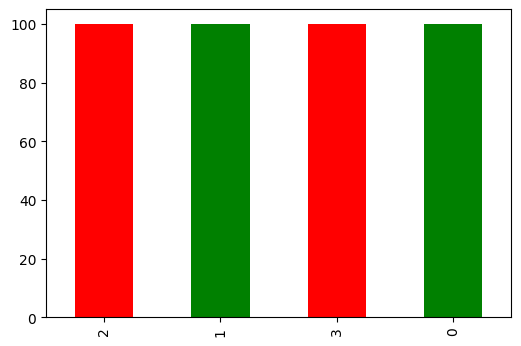

In [ ]:
#Class Distributions
df["Class"].value_counts().plot(figsize=(6,4),kind="bar",color=["red","green"])
#You can save the plot in your computer as well with the following line
#plt.savefig('plots/Language.png')

In [ ]:
# Information about the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Class                                           400 non-null    int64  
 1   _RMSenergy_Mean                                 400 non-null    float64
 2   _Lowenergy_Mean                                 400 non-null    float64
 3   _Fluctuation_Mean                               400 non-null    float64
 4   _Tempo_Mean                                     400 non-null    float64
 5   _MFCC_Mean_1                                    400 non-null    float64
 6   _MFCC_Mean_2                                    400 non-null    float64
 7   _MFCC_Mean_3                                    400 non-null    float64
 8   _MFCC_Mean_4                                    400 non-null    float64
 9   _MFCC_Mean_5                               

In [ ]:
# Are there any missing value in this dataset?
df.isna().sum()

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

In [ ]:
#Descriptive statistics(e.g. central tendency, dispersion and shape) of a dataset’s distribution.
df.describe()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
count,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,...,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00,400.00
mean,1.50,0.13,0.55,7.15,123.68,2.46,0.07,0.49,0.03,0.18,...,0.35,0.59,0.34,0.39,0.33,0.19,-0.00,1.76,0.77,0.97
std,1.12,0.06,0.05,2.28,34.23,0.80,0.54,0.29,0.28,0.20,...,0.33,0.36,0.32,0.35,0.06,0.05,0.10,0.93,0.07,0.00
min,0.00,0.01,0.30,3.58,48.28,0.32,-3.48,-0.87,-1.64,-0.49,...,0.00,0.00,0.00,0.00,0.11,0.06,-0.28,0.19,0.53,0.94
25%,0.75,0.09,0.52,5.86,101.49,1.95,-0.26,0.28,-0.12,0.06,...,0.07,0.26,0.06,0.06,0.29,0.16,-0.06,0.96,0.72,0.96
50%,1.50,0.13,0.55,6.73,120.13,2.39,0.07,0.46,0.04,0.18,...,0.25,0.61,0.25,0.30,0.33,0.19,-0.00,1.68,0.79,0.97
75%,2.25,0.17,0.58,7.82,148.99,2.86,0.41,0.69,0.20,0.29,...,0.61,1.00,0.57,0.67,0.37,0.23,0.06,2.24,0.82,0.97
max,3.00,0.43,0.70,23.48,195.03,6.00,1.94,1.62,1.13,1.05,...,1.00,1.00,1.00,1.00,0.49,0.34,0.44,4.49,0.91,0.98


In [ ]:
#Find Feature Importance using Pearson's Correlation
# Feature correlation matrix
df.corr()

,Class,_RMSenergy_Mean,_Lowenergy_Mean,_Fluctuation_Mean,_Tempo_Mean,_MFCC_Mean_1,_MFCC_Mean_2,_MFCC_Mean_3,_MFCC_Mean_4,_MFCC_Mean_5,...,_Chromagram_Mean_9,_Chromagram_Mean_10,_Chromagram_Mean_11,_Chromagram_Mean_12,_HarmonicChangeDetectionFunction_Mean,_HarmonicChangeDetectionFunction_Std,_HarmonicChangeDetectionFunction_Slope,_HarmonicChangeDetectionFunction_PeriodFreq,_HarmonicChangeDetectionFunction_PeriodAmp,_HarmonicChangeDetectionFunction_PeriodEntropy
Class,1.00,-0.30,0.18,0.24,-0.05,0.36,0.05,-0.12,-0.07,-0.04,...,0.06,-0.11,-0.03,0.06,0.33,0.66,0.02,-0.22,-0.56,-0.08
_RMSenergy_Mean,-0.30,1.00,-0.28,-0.17,0.00,-0.20,-0.00,0.06,0.02,-0.06,...,0.12,0.12,0.13,0.02,-0.03,-0.36,-0.09,0.14,0.34,0.02
_Lowenergy_Mean,0.18,-0.28,1.00,0.05,-0.04,0.12,0.13,-0.06,0.05,0.02,...,0.07,-0.03,0.09,-0.03,0.04,0.21,0.22,-0.11,-0.20,-0.06
_Fluctuation_Mean,0.24,-0.17,0.05,1.00,-0.12,0.08,0.07,-0.11,0.05,-0.05,...,-0.06,-0.13,0.01,-0.02,0.23,0.31,0.08,-0.04,-0.24,-0.02
_Tempo_Mean,-0.05,0.00,-0.04,-0.12,1.00,-0.07,0.09,0.02,0.04,0.07,...,0.04,0.06,0.02,0.01,-0.09,-0.13,-0.06,0.02,0.05,0.10
_MFCC_Mean_1,0.36,-0.20,0.12,0.08,-0.07,1.00,0.02,0.06,0.04,-0.10,...,-0.14,-0.10,-0.12,-0.03,-0.02,0.42,0.03,-0.13,-0.46,-0.10
_MFCC_Mean_2,0.05,-0.00,0.13,0.07,0.09,0.02,1.00,0.03,0.38,0.18,...,0.02,0.01,-0.10,-0.03,-0.05,0.11,0.15,-0.04,-0.15,0.03
_MFCC_Mean_3,-0.12,0.06,-0.06,-0.11,0.02,0.06,0.03,1.00,0.19,0.10,...,-0.09,0.01,-0.05,0.01,-0.17,-0.07,0.08,-0.04,-0.02,-0.08
_MFCC_Mean_4,-0.07,0.02,0.05,0.05,0.04,0.04,0.38,0.19,1.00,0.27,...,-0.04,0.06,-0.08,-0.03,-0.08,-0.02,0.12,-0.06,0.01,-0.11
_MFCC_Mean_5,-0.04,-0.06,0.02,-0.05,0.07,-0.10,0.18,0.10,0.27,1.00,...,0.05,0.00,0.03,0.03,-0.08,-0.11,0.04,0.03,0.05,0.00


<Axes: >

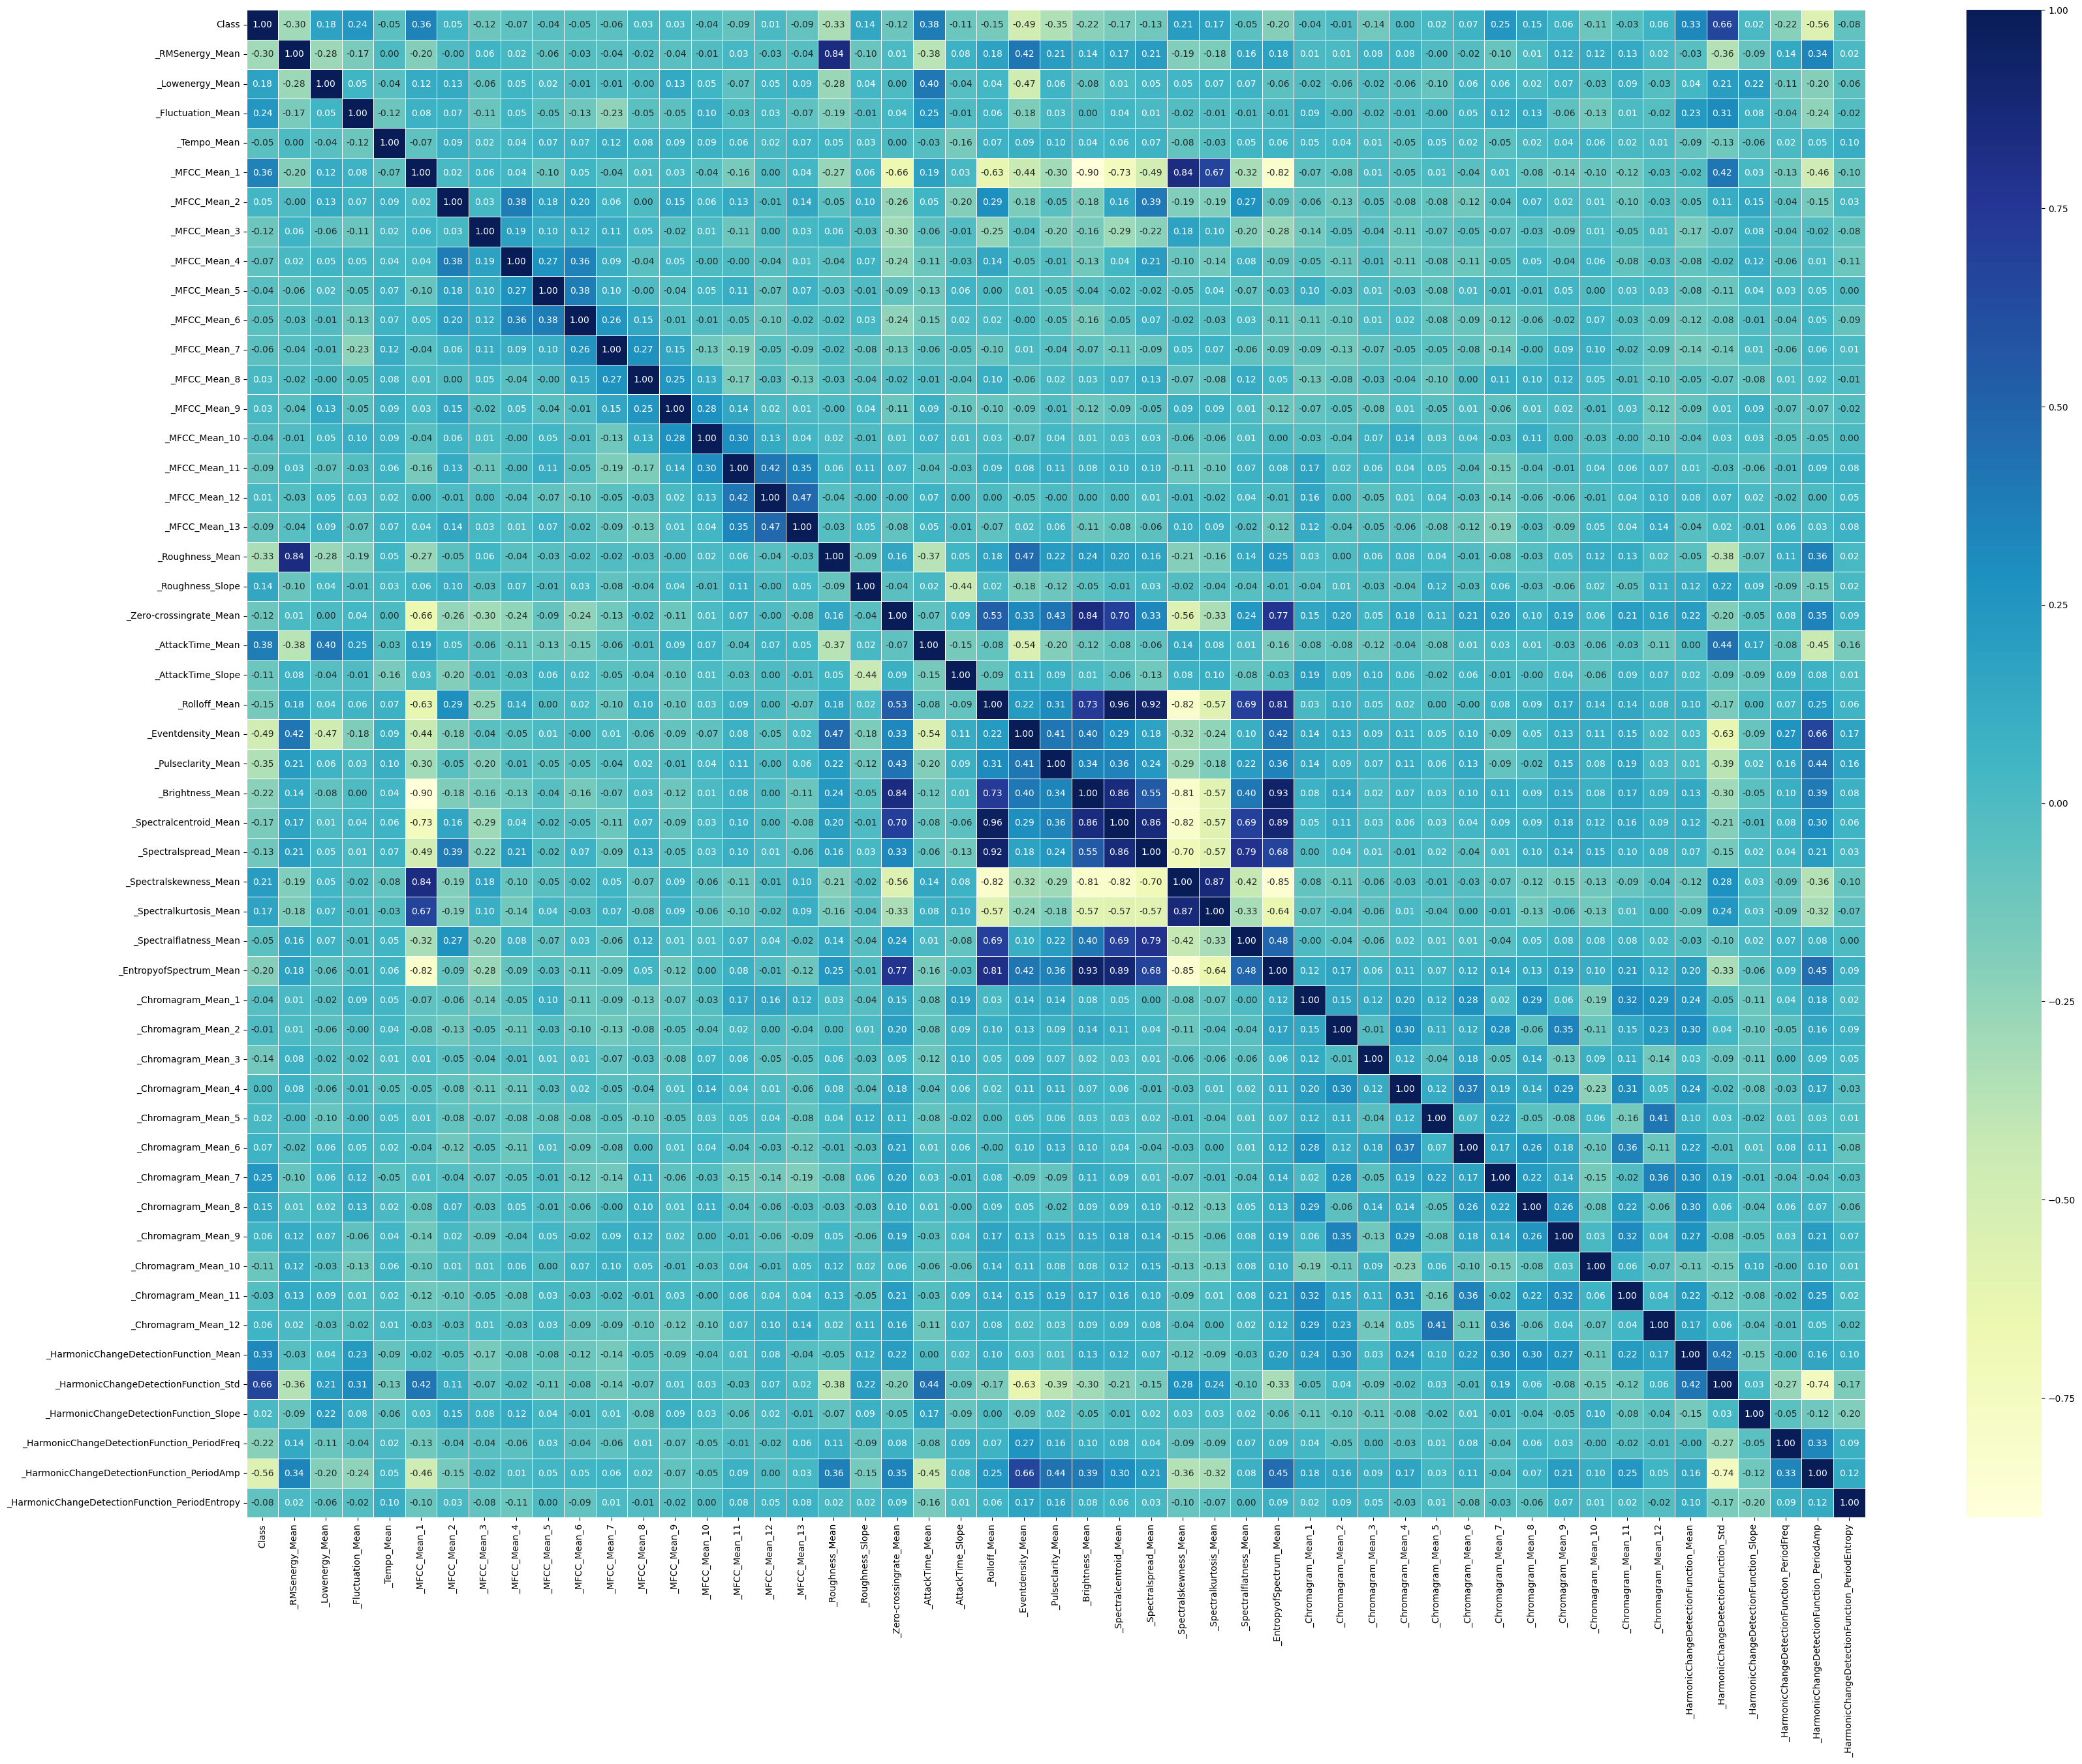

In [ ]:
#Feature correlation matrix visualisation
plt.figure(figsize=(40,30))
corr_mtx=df.corr()
sns.heatmap(corr_mtx,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

#Data Preparation: plitting data into X and Y

In [ ]:
#Convert Catagorial value of (Class) column to numerical

#create a instance of label encoder
label_instance = LabelEncoder()

# Use .fit_transform function to fit label and encoder will return encoded label
df['Class'] = label_instance.fit_transform(df['Class'])

In [ ]:
# splitting data into X(independent variable) and Y(dependent variable)
X=df.drop("Class",axis=1)
Y=df["Class"]

In [ ]:
#print to check the shapre of  X and Y
Y

0      2
1      2
2      2
3      2
4      2
      ..
395    0
396    0
397    0
398    0
399    0
Name: Class, Length: 400, dtype: int64

#Generalized Model Class

This can be used for any Machine learning Model

In [ ]:
#Import all the requierd Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.metrics import confusion_matrix,classification_report
from operator import truediv
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, auc

class Unified_Model_Runner:
    def __init__(self, model, random_state=7):
        self.model = model
        self.random_state = random_state
        self.X, self.Y = None, None
    #method for spliting data into independent(X) and target variable(Y)
    def set_data(self, X, Y):
        self.X, self.Y = X, Y.values.ravel()
    #method for test train
    def train_test_split(self, test_size=0.2):
        self.X_train, self.X_test, self.Y_train, self.Y_test = train_test_split(self.X, self.Y, test_size=test_size, random_state=self.random_state)
    #chi2 feature selection
    def chi2_features_selection(self, k=40):
        chi = SelectKBest(chi2, k=k)
        self.feature = chi.fit(self.X, self.Y).get_support()
        self.X = chi.fit_transform(self.X, self.Y)
        return [i for i, selected in enumerate(self.feature) if selected]
    #anovaf1 feature selection
    def anovaf1_test_features_selection(self, k=40):
        anova = SelectKBest(f_classif, k=k)
        self.feature = anova.fit(self.X, self.Y).get_support()
        self.X = anova.fit_transform(self.X, self.Y)
        return [i for i, selected in enumerate(self.feature) if selected]
    #mutual square feature selection
    def mutual_info_features_selection(self, k=40):
        mutual_info = SelectKBest(mutual_info_classif, k=k)
        self.feature = mutual_info.fit(self.X, self.Y).get_support()
        self.X = mutual_info.fit_transform(self.X, self.Y)
        return [i for i, selected in enumerate(self.feature) if selected]
    #method to train the model
    def train_model(self):
        self.model.fit(self.X_train, self.Y_train)
    #method to evaluate the model
    def evaluate_model(self):
        y_pred = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.Y_test, y_pred)
        return accuracy
    #method to cros-validate the model
    def cross_validation(self, cv=5):
        scores = cross_val_score(self.model, self.X, self.Y, cv=cv)
        return scores
    #method to generate confusion matrix
    def cm_matrix(self):
        y_pred = self.model.predict(self.X_test)
        accuracy = accuracy_score(self.Y_test, y_pred)
        # Plot Confusion Matrix
        cm = confusion_matrix(self.Y_test, y_pred)
        plt.figure(figsize=(6,6))
        sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
        plt.ylabel('Actual label');
        plt.xlabel('Predicted label');
        all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
        plt.title(all_sample_title, size = 15)
    #method to calculate the performance measures
    def calculate_performance(self):
        y_pred = self.model.predict(self.X_test)
        y_true  = self.Y_test
        labels = list(label_instance.classes_)
        (acc, P, R, F1) = (0.0, 0.0, 0.0, 0.0)
        acc = metrics.accuracy_score(y_true, y_pred)
        P = metrics.precision_score(y_true, y_pred, average='micro')
        R = metrics.recall_score(y_true, y_pred, average='micro')
        F1 = metrics.f1_score(y_true, y_pred, average='micro')
        report = metrics.classification_report(y_true, y_pred, target_names=labels)
        return acc * 100, P * 100, R * 100, F1 * 100, report

    #method to generate ROC curve
    def roc_curve(self):
        # ROC Curve
        roc_data = {}
        # Loop over each class in your multi-class problem
        for class_idx in range(0,4):
            # Predict the probability for the current class
            y_pred_prob = self.model.predict_proba(self.X_test)[:, class_idx]

            # Compute ROC curve and AUC for the current class
            fpr, tpr, thresholds = roc_curve(self.Y_test == class_idx, y_pred_prob)
            roc_auc = auc(fpr, tpr)

            # Store the ROC curve data and AUC for the current class
            roc_data[class_idx] = (fpr, tpr, roc_auc)

        # Plot ROC curves for each class
        plt.figure(figsize=(6, 6))
        for class_idx, (fpr, tpr, roc_auc) in roc_data.items():
            plt.plot(fpr, tpr, label=f'Class {class_idx} (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Multi-Class ROC Curves')
        plt.legend(loc='best')
        plt.show()


# Logistic Regresson

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

model = LogisticRegression(max_iter=10000)

runner = Unified_Model_Runner(model)
runner.set_data(X,Y)

def fun():
  runner.train_test_split()
  runner.train_model()
  accuracy = runner.evaluate_model()
  cross_val_scores = runner.cross_validation(cv=10)
  print(f"Accuracy: {accuracy*100:.2f}")
  print(f"Cross-validation scores: {cross_val_scores*100}\nAvg Cross-validation Scores: {(sum(cross_val_scores)/10)*100:.2f}")
  #Accuracy Precision Recall
  acc, precision, recall, F1, report = runner.calculate_performance()
  result = "\t\t"+str("{0:.2f}".format(acc)) + "\t\t" + str("{0:.2f}".format(precision)) + "\t\t" + str(
        "{0:.2f}".format(recall)) + "\t\t" + str("{0:.2f}".format(F1)) + "\n"
  print("Test set:\t Acc\t\tPrecision\tRecall\t\tF1\n" + result)
  print(report)



for i in range(4):
  if i == 0:
    print("\033[1m"+"\nWithout any Feature Selection"+"\033[0m")
    fun()
  elif(i==1):
    print("\033[1m"+"\nWith anova f1 square Feature Selection"+"\033[0m")
    selected_features= runner.anovaf1_test_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==2):
    print("\033[1m"+"\nWith mutual info square Feature Selection"+"\033[0m")
    selected_features = runner.mutual_info_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==3):
    print("\033[1m"+"\nWith chi square Feature Selection"+"\033[0m")
    selected_features = runner.chi2_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()




Without any Feature Selection
Accuracy: 82.50
Cross-validation scores: [90.  82.5 75.  80.  80.  77.5 77.5 90.  60.  82.5]
Avg Cross-validation Scores: 79.50
Test set:	 Acc		Precision	Recall		F1
		82.50		82.50		82.50		82.50

              precision    recall  f1-score   support

       angry       0.83      0.86      0.84        22
       happy       0.89      0.89      0.89        18
       relax       0.94      0.79      0.86        19
         sad       0.70      0.76      0.73        21

    accuracy                           0.82        80
   macro avg       0.84      0.83      0.83        80
weighted avg       0.83      0.82      0.83        80


With anova f1 square Feature Selection
Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
Accuracy: 81.25
Cross-validation scores: [87.5 85.  70.  77.5 80.  77.5 82.5 92.5 62.5 80. ]
Avg Cross-validation Scores: 79.50


In [ ]:
#confusion matrix
#runner.cm_matrix()

#Accuracy Precision Recall
#runner.calculate_performance()

#ROC curve
#runner.roc_curve()

# K Nearnest Neighber

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

model = KNeighborsClassifier()

runner = Unified_Model_Runner(model)
runner.set_data(X, Y)

def fun():
  runner.train_test_split()
  runner.train_model()
  accuracy = runner.evaluate_model()
  cross_val_scores = runner.cross_validation(cv=10)
  print(f"Accuracy: {accuracy*100:.2f}")
  print(f"Cross-validation scores: {cross_val_scores*100}\nAvg Cross-validation Scores: {(sum(cross_val_scores)/10)*100:.2f}")
  #Accuracy Precision Recall
  acc, precision, recall, F1, report = runner.calculate_performance()
  result = "\t\t"+str("{0:.2f}".format(acc)) + "\t\t" + str("{0:.2f}".format(precision)) + "\t\t" + str(
        "{0:.2f}".format(recall)) + "\t\t" + str("{0:.2f}".format(F1)) + "\n"
  print("Test set:\t Acc\t\tPrecision\tRecall\t\tF1\n" + result)
  print(report)



for i in range(4):
  if i == 0:
    print("\033[1m"+"\nWithout any Feature Selection"+"\033[0m")
    fun()
  elif(i==1):
    print("\033[1m"+"\nWith anova f1 square Feature Selection"+"\033[0m")
    selected_features= runner.anovaf1_test_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==2):
    print("\033[1m"+"\nWith mutual info square Feature Selection"+"\033[0m")
    selected_features = runner.mutual_info_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==3):
    print("\033[1m"+"\nWith chi square Feature Selection"+"\033[0m")
    selected_features = runner.chi2_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()




Without any Feature Selection
Accuracy: 60.00
Cross-validation scores: [67.5 65.  67.5 52.5 57.5 62.5 62.5 72.5 60.  57.5]
Avg Cross-validation Scores: 62.50
Test set:	 Acc		Precision	Recall		F1
		60.00		60.00		60.00		60.00

              precision    recall  f1-score   support

       angry       0.59      0.73      0.65        22
       happy       0.65      0.83      0.73        18
       relax       0.50      0.47      0.49        19
         sad       0.67      0.38      0.48        21

    accuracy                           0.60        80
   macro avg       0.60      0.60      0.59        80
weighted avg       0.60      0.60      0.59        80


With anova f1 square Feature Selection
Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
Accuracy: 57.50
Cross-validation scores: [65.  75.  75.  62.5 67.5 60.  70.  75.  60.  70. ]
Avg Cross-validation Scores: 68.00


In [ ]:
#confusion matrix
#runner.cm_matrix()

#Accuracy Precision Recall
#runner.calculate_performance()

#ROC curve
#runner.roc_curve()

# Decision Tree

In [ ]:
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler

# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

model = tree.DecisionTreeClassifier()

runner = Unified_Model_Runner(model)
runner.set_data(X, Y)

def fun():
  runner.train_test_split()
  runner.train_model()
  accuracy = runner.evaluate_model()
  cross_val_scores = runner.cross_validation(cv=10)
  print(f"Accuracy: {accuracy*100:.2f}")
  print(f"Cross-validation scores: {cross_val_scores*100}\nAvg Cross-validation Scores: {(sum(cross_val_scores)/10)*100:.2f}")
  #Accuracy Precision Recall
  acc, precision, recall, F1, report = runner.calculate_performance()
  result = "\t\t"+str("{0:.2f}".format(acc)) + "\t\t" + str("{0:.2f}".format(precision)) + "\t\t" + str(
        "{0:.2f}".format(recall)) + "\t\t" + str("{0:.2f}".format(F1)) + "\n"
  print("Test set:\t Acc\t\tPrecision\tRecall\t\tF1\n" + result)
  print(report)



for i in range(4):
  if i == 0:
    print("\033[1m"+"\nWithout any Feature Selection"+"\033[0m")
    fun()
  elif(i==1):
    print("\033[1m"+"\nWith anova f1 square Feature Selection"+"\033[0m")
    selected_features= runner.anovaf1_test_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==2):
    print("\033[1m"+"\nWith mutual info square Feature Selection"+"\033[0m")
    selected_features = runner.mutual_info_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==3):
    print("\033[1m"+"\nWith chi square Feature Selection"+"\033[0m")
    selected_features = runner.chi2_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()




Without any Feature Selection
Accuracy: 68.75
Cross-validation scores: [65.  80.  62.5 65.  65.  70.  72.5 72.5 65.  57.5]
Avg Cross-validation Scores: 67.50
Test set:	 Acc		Precision	Recall		F1
		68.75		68.75		68.75		68.75

              precision    recall  f1-score   support

       angry       0.76      0.86      0.81        22
       happy       0.76      0.72      0.74        18
       relax       0.63      0.63      0.63        19
         sad       0.58      0.52      0.55        21

    accuracy                           0.69        80
   macro avg       0.68      0.69      0.68        80
weighted avg       0.68      0.69      0.68        80


With anova f1 square Feature Selection
Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
Accuracy: 72.50
Cross-validation scores: [75.  75.  62.5 62.5 70.  65.  77.5 72.5 70.  57.5]
Avg Cross-validation Scores: 68.75


In [ ]:
#confusion matrix
#runner.cm_matrix()

#Accuracy Precision Recall
#runner.calculate_performance()

#ROC curve
#runner.roc_curve()

# Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

model = RandomForestClassifier()

runner = Unified_Model_Runner(model)
runner.set_data(X, Y)

def fun():
  runner.train_test_split()
  runner.train_model()
  accuracy = runner.evaluate_model()
  cross_val_scores = runner.cross_validation(cv=10)
  print(f"Accuracy: {accuracy*100:.2f}")
  print(f"Cross-validation scores: {cross_val_scores*100}\nAvg Cross-validation Scores: {(sum(cross_val_scores)/10)*100:.2f}")
  #Accuracy Precision Recall
  acc, precision, recall, F1, report = runner.calculate_performance()
  result = "\t\t"+str("{0:.2f}".format(acc)) + "\t\t" + str("{0:.2f}".format(precision)) + "\t\t" + str(
        "{0:.2f}".format(recall)) + "\t\t" + str("{0:.2f}".format(F1)) + "\n"
  print("Test set:\t Acc\t\tPrecision\tRecall\t\tF1\n" + result)
  print(report)



for i in range(4):
  if i == 0:
    print("\033[1m"+"\nWithout any Feature Selection"+"\033[0m")
    fun()
  elif(i==1):
    print("\033[1m"+"\nWith anova f1 square Feature Selection"+"\033[0m")
    selected_features= runner.anovaf1_test_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==2):
    print("\033[1m"+"\nWith mutual info square Feature Selection"+"\033[0m")
    selected_features = runner.mutual_info_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==3):
    print("\033[1m"+"\nWith chi square Feature Selection"+"\033[0m")
    selected_features = runner.chi2_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()




Without any Feature Selection
Accuracy: 82.50
Cross-validation scores: [82.5 82.5 82.5 72.5 87.5 67.5 80.  92.5 77.5 67.5]
Avg Cross-validation Scores: 79.25
Test set:	 Acc		Precision	Recall		F1
		82.50		82.50		82.50		82.50

              precision    recall  f1-score   support

       angry       0.87      0.91      0.89        22
       happy       0.84      0.89      0.86        18
       relax       0.84      0.84      0.84        19
         sad       0.74      0.67      0.70        21

    accuracy                           0.82        80
   macro avg       0.82      0.83      0.82        80
weighted avg       0.82      0.82      0.82        80


With anova f1 square Feature Selection
Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
Accuracy: 78.75
Cross-validation scores: [77.5 87.5 75.  72.5 85.  70.  82.5 92.5 77.5 75. ]
Avg Cross-validation Scores: 79.50


In [ ]:
#confusion matrix
#runner.cm_matrix()

#Accuracy Precision Recall
#runner.calculate_performance()

#ROC curve
#runner.roc_curve()

# Support Vectore Machine (Linear)

In [ ]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler

# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

model = svm.SVC(kernel='linear', C=2, decision_function_shape='ovo', probability=True)

runner = Unified_Model_Runner(model)
runner.set_data(X, Y)

def fun():
  runner.train_test_split()
  runner.train_model()
  accuracy = runner.evaluate_model()
  cross_val_scores = runner.cross_validation(cv=10)
  print(f"Accuracy: {accuracy*100:.2f}")
  print(f"Cross-validation scores: {cross_val_scores*100}\nAvg Cross-validation Scores: {(sum(cross_val_scores)/10)*100:.2f}")
  #Accuracy Precision Recall
  acc, precision, recall, F1, report = runner.calculate_performance()
  result = "\t\t"+str("{0:.2f}".format(acc)) + "\t\t" + str("{0:.2f}".format(precision)) + "\t\t" + str(
        "{0:.2f}".format(recall)) + "\t\t" + str("{0:.2f}".format(F1)) + "\n"
  print("Test set:\t Acc\t\tPrecision\tRecall\t\tF1\n" + result)
  print(report)



for i in range(4):
  if i == 0:
    print("\033[1m"+"\nWithout any Feature Selection"+"\033[0m")
    fun()
  elif(i==1):
    print("\033[1m"+"\nWith anova f1 square Feature Selection"+"\033[0m")
    selected_features= runner.anovaf1_test_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==2):
    print("\033[1m"+"\nWith mutual info square Feature Selection"+"\033[0m")
    selected_features = runner.mutual_info_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==3):
    print("\033[1m"+"\nWith chi square Feature Selection"+"\033[0m")
    selected_features = runner.chi2_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()




Without any Feature Selection
Accuracy: 73.75
Cross-validation scores: [90.  82.5 82.5 80.  77.5 77.5 80.  90.  57.5 77.5]
Avg Cross-validation Scores: 79.50
Test set:	 Acc		Precision	Recall		F1
		73.75		73.75		73.75		73.75

              precision    recall  f1-score   support

       angry       0.82      0.82      0.82        22
       happy       0.80      0.89      0.84        18
       relax       0.75      0.79      0.77        19
         sad       0.56      0.48      0.51        21

    accuracy                           0.74        80
   macro avg       0.73      0.74      0.74        80
weighted avg       0.73      0.74      0.73        80


With anova f1 square Feature Selection
Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
Accuracy: 78.75
Cross-validation scores: [90.  82.5 77.5 80.  80.  82.5 82.5 90.  60.  77.5]
Avg Cross-validation Scores: 80.25


In [ ]:
#confusion matrix
#runner.cm_matrix()

#Accuracy Precision Recall
#runner.calculate_performance()

#ROC curve
#runner.roc_curve()

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

# Scale the data to the range [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

model = GaussianNB()

runner = Unified_Model_Runner(model)
runner.set_data(X, Y)

def fun():
  runner.train_test_split()
  runner.train_model()
  accuracy = runner.evaluate_model()
  cross_val_scores = runner.cross_validation(cv=10)
  print(f"Accuracy: {accuracy*100:.2f}")
  print(f"Cross-validation scores: {cross_val_scores*100}\nAvg Cross-validation Scores: {(sum(cross_val_scores)/10)*100:.2f}")
  #Accuracy Precision Recall
  acc, precision, recall, F1, report = runner.calculate_performance()
  result = "\t\t"+str("{0:.2f}".format(acc)) + "\t\t" + str("{0:.2f}".format(precision)) + "\t\t" + str(
        "{0:.2f}".format(recall)) + "\t\t" + str("{0:.2f}".format(F1)) + "\n"
  print("Test set:\t Acc\t\tPrecision\tRecall\t\tF1\n" + result)
  print(report)



for i in range(4):
  if i == 0:
    print("\033[1m"+"\nWithout any Feature Selection"+"\033[0m")
    fun()
  elif(i==1):
    print("\033[1m"+"\nWith anova f1 square Feature Selection"+"\033[0m")
    selected_features= runner.anovaf1_test_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==2):
    print("\033[1m"+"\nWith mutual info square Feature Selection"+"\033[0m")
    selected_features = runner.mutual_info_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()
  elif(i==3):
    print("\033[1m"+"\nWith chi square Feature Selection"+"\033[0m")
    selected_features = runner.chi2_features_selection(k=40)
    print(f"Selected features: {selected_features}")
    fun()




Without any Feature Selection
Accuracy: 75.00
Cross-validation scores: [92.5 82.5 75.  72.5 75.  65.  77.5 75.  77.5 67.5]
Avg Cross-validation Scores: 76.00
Test set:	 Acc		Precision	Recall		F1
		75.00		75.00		75.00		75.00

              precision    recall  f1-score   support

       angry       0.83      0.91      0.87        22
       happy       0.68      0.94      0.79        18
       relax       0.72      0.68      0.70        19
         sad       0.77      0.48      0.59        21

    accuracy                           0.75        80
   macro avg       0.75      0.75      0.74        80
weighted avg       0.76      0.75      0.74        80


With anova f1 square Feature Selection
Selected features: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49]
Accuracy: 75.00
Cross-validation scores: [92.5 85.  75.  70.  72.5 62.5 75.  77.5 72.5 67.5]
Avg Cross-validation Scores: 75.00


In [ ]:
#confusion matrix
#runner.cm_matrix()

#Accuracy Precision Recall
#runner.calculate_performance()

#ROC curve
#runner.roc_curve()

#All other models with Lazy Classifier

In [ ]:
!pip install lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
#split X and Y into train and test dataset
#let's take standart 70% data for training and 30 % for testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=7)
# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, Y_train, Y_test)
models

 93%|█████████▎| 27/29 [00:01<00:00, 17.53it/s]

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4507
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 50
[LightGBM] [Info] Start training from score -1.411612
[LightGBM] [Info] Start training from score -1.361602
[LightGBM] [Info] Start training from score -1.373872
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

100%|██████████| 29/29 [00:02<00:00, 10.81it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RidgeClassifierCV,0.81,0.82,None,0.81,0.01
ExtraTreesClassifier,0.80,0.80,None,0.79,0.15
RidgeClassifier,0.80,0.80,None,0.79,0.02
SVC,0.80,0.80,None,0.80,0.05
NuSVC,0.79,0.79,None,0.79,0.02
NearestCentroid,0.78,0.78,None,0.77,0.01
Perceptron,0.78,0.78,None,0.77,0.01
CalibratedClassifierCV,0.76,0.77,None,0.76,0.29
LinearDiscriminantAnalysis,0.76,0.77,None,0.76,0.05


#Neural Network(NN) Based Models

Data Preparation for NN models

In [ ]:
#split the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=7)

#1 layer ANN

In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

#Create the single layer ANN model
model = Sequential([
  Dense(64, input_dim=50, activation='relu'), # input layer requires input_dim param
  Dense(16, activation='relu'),
  Dropout(.4),
  Dense(4, activation='softmax')# softmax for multiclass classification
])

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# One-hot encode the labels for both training and testing data
y_train = to_categorical(Y_train, num_classes=4)
y_test = to_categorical(Y_test, num_classes=4)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
10/10 [==============================] - 1s 21ms/step - loss: 1.4684 - accuracy: 0.2438 - val_loss: 1.3469 - val_accuracy: 0.3375
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 1.3592 - accuracy: 0.3281 - val_loss: 1.3300 - val_accuracy: 0.3625
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 1.3266 - accuracy: 0.3844 - val_loss: 1.3067 - val_accuracy: 0.4375
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 1.3272 - accuracy: 0.3656 - val_loss: 1.2792 - val_accuracy: 0.5000
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 1.2865 - accuracy: 0.4219 - val_loss: 1.2543 - val_accuracy: 0.4875
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 1.2557 - accuracy: 0.4844 - val_loss: 1.2285 - val_accuracy: 0.6250
Epoch 7/50
10/10 [==============================] - 0s 4ms/step - loss: 1.2459 - accuracy: 0.4844 - val_loss: 1.1964 - val_accuracy: 0.6500
Epoch 8/50
10/10 [=

In [ ]:
#Function to calculate accuracy, precision, recall and f1 score
from sklearn import metrics
def calculate_performance(y_true, y_pred, labels):
    (acc, P, R, F1) = (0.0, 0.0, 0.0, 0.0)
    acc = metrics.accuracy_score(y_true, y_pred)
    P = metrics.precision_score(y_true, y_pred, average='micro')
    R = metrics.recall_score(y_true, y_pred, average='micro')
    F1 = metrics.f1_score(y_true, y_pred, average='micro')
    report = metrics.classification_report(y_true, y_pred, target_names=labels)

    return acc * 100, P * 100, R * 100, F1 * 100, report

In [ ]:
# make prediction
predictions = model.predict(X_test)

# Convert one-hot encoded labels back to class labels
y_pred = predictions.argmax(axis=-1)
y_test = Y_test

labels = list(label_instance.classes_)

acc, precision, recall, F1, report = calculate_performance(y_test, y_pred, labels)

result = "\t\t"+str("{0:.2f}".format(acc)) + "\t" + str("{0:.2f}".format(precision)) + "\t\t" + str(
        "{0:.2f}".format(recall)) + "\t\t" + str("{0:.2f}".format(F1)) + "\n"
print("Test set:\t Acc\tPrecision\tRecall\t\tF1\n" + result)
print(report)



3/3 [==============================] - 0s 2ms/step
Test set:	 Acc	Precision	Recall		F1
		80.00	80.00		80.00		80.00

              precision    recall  f1-score   support

       angry       0.78      0.82      0.80        22
       happy       0.89      0.94      0.92        18
       relax       0.80      0.84      0.82        19
         sad       0.72      0.62      0.67        21

    accuracy                           0.80        80
   macro avg       0.80      0.81      0.80        80
weighted avg       0.80      0.80      0.80        80



#Mutli layer ANN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout,MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Create the multi-layer ANN model
model = Sequential([
  Dense(64, input_dim=50, activation='relu'), # input layer requires input_dim param
  Dense(256, activation='relu'),
  Dropout(.2),
  Dense(64, input_dim=50, activation='relu'),
  Dropout(.2),
  Dense(128, activation='relu'),
  Dropout(.2),
  Dense(64, input_dim=50, activation='relu'),
  Dense(128, activation='relu'),
  Dropout(.2),
  Dense(64, input_dim=50, activation='relu'),
  Dropout(.3),
  Dense(256, activation='relu'),
  Dropout(.5),
  Dense(4, activation='softmax')# softmax for multiclass classification
])

# compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# One-hot encode the labels for both training and testing data
y_train = to_categorical(Y_train, num_classes=4)
y_test = to_categorical(Y_test, num_classes=4)

# train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))



Epoch 1/50
10/10 [==============================] - 1s 21ms/step - loss: 1.3841 - accuracy: 0.2469 - val_loss: 1.3841 - val_accuracy: 0.2250
Epoch 2/50
10/10 [==============================] - 0s 4ms/step - loss: 1.3862 - accuracy: 0.2125 - val_loss: 1.3784 - val_accuracy: 0.2250
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 1.3777 - accuracy: 0.2969 - val_loss: 1.3700 - val_accuracy: 0.2625
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 1.3636 - accuracy: 0.3125 - val_loss: 1.3381 - val_accuracy: 0.3500
Epoch 5/50
10/10 [==============================] - 0s 4ms/step - loss: 1.3230 - accuracy: 0.3688 - val_loss: 1.2799 - val_accuracy: 0.4375
Epoch 6/50
10/10 [==============================] - 0s 4ms/step - loss: 1.2610 - accuracy: 0.4375 - val_loss: 1.1992 - val_accuracy: 0.4500
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 1.1910 - accuracy: 0.4437 - val_loss: 1.2632 - val_accuracy: 0.3625
Epoch 8/50
10/10 [=

In [ ]:
# make prediction
predictions = model.predict(X_test)

# Convert one-hot encoded labels back to class labels
y_pred = predictions.argmax(axis=-1)
y_test = Y_test

labels = list(label_instance.classes_)

acc, precision, recall, F1, report = calculate_performance(y_test, y_pred, labels)

result = "\t\t"+str("{0:.2f}".format(acc)) + "\t" + str("{0:.2f}".format(precision)) + "\t\t" + str(
        "{0:.2f}".format(recall)) + "\t\t" + str("{0:.2f}".format(F1)) + "\n"
print("Test set:\t Acc\tPrecision\tRecall\t\tF1\n" + result)
print(report)



3/3 [==============================] - 0s 2ms/step
Test set:	 Acc	Precision	Recall		F1
		81.25	81.25		81.25		81.25

              precision    recall  f1-score   support

       angry       0.94      0.77      0.85        22
       happy       0.89      0.89      0.89        18
       relax       0.84      0.84      0.84        19
         sad       0.64      0.76      0.70        21

    accuracy                           0.81        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.81      0.82        80



#RNN

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical  # Import one-hot encoding

# Create the RNN model
model = keras.Sequential([
    layers.Input(shape=(50,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(4, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# One-hot encode the labels for both training and testing data
y_train = to_categorical(Y_train, num_classes=4)
y_test = to_categorical(Y_test, num_classes=4)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
10/10 [==============================] - 1s 23ms/step - loss: 1.3397 - accuracy: 0.3469 - val_loss: 1.2133 - val_accuracy: 0.6125
Epoch 2/50
10/10 [==============================] - 0s 8ms/step - loss: 1.0795 - accuracy: 0.5375 - val_loss: 0.9134 - val_accuracy: 0.6500
Epoch 3/50
10/10 [==============================] - 0s 10ms/step - loss: 0.7655 - accuracy: 0.7031 - val_loss: 0.8575 - val_accuracy: 0.6625
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.7546 - accuracy: 0.6875 - val_loss: 0.9317 - val_accuracy: 0.6000
Epoch 5/50
10/10 [==============================] - 0s 9ms/step - loss: 0.5885 - accuracy: 0.7688 - val_loss: 0.7863 - val_accuracy: 0.6625
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.5085 - accuracy: 0.8031 - val_loss: 0.7310 - val_accuracy: 0.7250
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.4125 - accuracy: 0.8438 - val_loss: 0.6919 - val_accuracy: 0.7500
Epoch 8/50
10/10 [

In [ ]:
# make prediction
predictions = model.predict(X_test)

# Convert one-hot encoded labels back to class labels
y_pred = predictions.argmax(axis=-1)
y_test = Y_test

labels = list(label_instance.classes_)

acc, precision, recall, F1, report = calculate_performance(y_test, y_pred, labels)

result = "\t\t"+str("{0:.2f}".format(acc)) + "\t" + str("{0:.2f}".format(precision)) + "\t\t" + str(
        "{0:.2f}".format(recall)) + "\t\t" + str("{0:.2f}".format(F1)) + "\n"
print("Test set:\t Acc\tPrecision\tRecall\t\tF1\n" + result)
print(report)



3/3 [==============================] - 0s 3ms/step
Test set:	 Acc	Precision	Recall		F1
		80.00	80.00		80.00		80.00

              precision    recall  f1-score   support

       angry       0.83      0.86      0.84        22
       happy       0.89      0.89      0.89        18
       relax       0.93      0.68      0.79        19
         sad       0.64      0.76      0.70        21

    accuracy                           0.80        80
   macro avg       0.82      0.80      0.80        80
weighted avg       0.82      0.80      0.80        80

